# KUUDES ADVERTISING (Logistic Regression)

In this project we will be working with an advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

See columne description below

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [1]:
#import libraries
import numpy as np
import pandas as pd

In [2]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#import the dataset
ad_data = pd.read_csv('advertising.csv')

In [4]:
#check dataset
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
#Exploratory data analysis
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


### the data does not contain null values

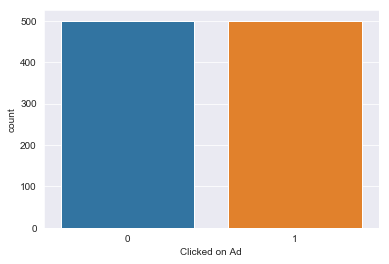

In [6]:
#Exploratory analysis contd
sns.set_style('darkgrid')
sns.countplot('Clicked on Ad', data = ad_data)

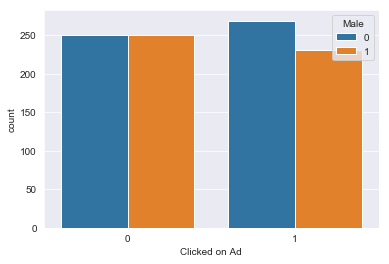

In [7]:
sns.countplot('Clicked on Ad',hue = 'Male', data = ad_data)

In [8]:
ad_data['Country'].value_counts().head()

Czech Republic    9
France            9
Australia         8
Peru              8
South Africa      8
Name: Country, dtype: int64

In [9]:
ad_data['City'].value_counts().head()

Lisamouth       3
Williamsport    3
Lake Jose       2
Millerbury      2
East John       2
Name: City, dtype: int64

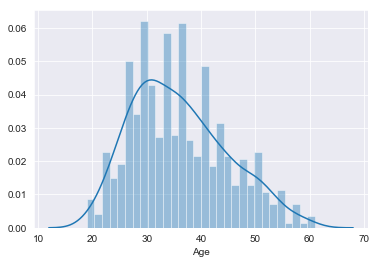

In [10]:
#exploratory analysis contd
sns.distplot(ad_data['Age'],bins = 30)

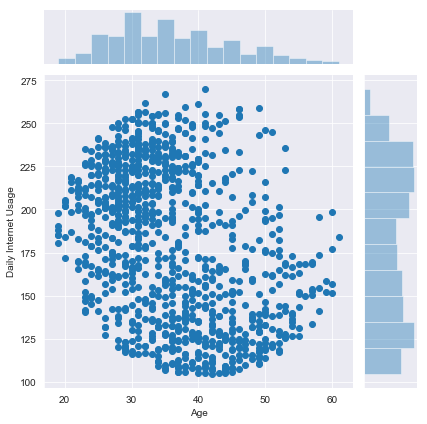

In [11]:
sns.jointplot(x ='Age', y = 'Daily Internet Usage', data = ad_data)

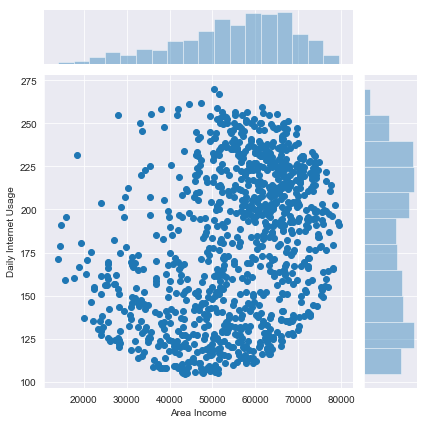

In [12]:
sns.jointplot(x ='Area Income', y = 'Daily Internet Usage', data = ad_data)

In [13]:
#For now we are going to drop the columns with text values and too many categories like country, city and timestamp
x = ad_data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']]
y = ad_data['Clicked on Ad']

In [14]:
#import modules from scikit learn to split  the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)

In [15]:
#import Logistic regression model and create an instance of the model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='lbfgs')

In [16]:
#train the model on the train data
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
predictions = log_model.predict(X_test)

In [18]:
#Model evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       120
           1       0.93      0.85      0.89       130

   micro avg       0.89      0.89      0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.90      0.89      0.89       250



In [19]:
#import confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[112   8]
 [ 19 111]]


## This model can satisfactorily predict whether a customer will click on a Ad or not.